In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('transfermarkt.db')

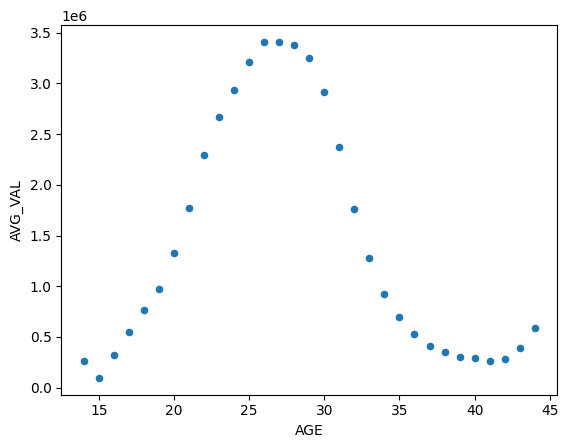

In [2]:
# SQL: Find average player valuation vs player age
query = """
SELECT pv.DATE-p.DATE_OF_BIRTH AS AGE
    ,ROUND(AVG(pv.market_value_in_eur),2) AS AVG_VAL
FROM PLAYERS p
INNER JOIN PLAYER_VALUATIONS pv
ON p.PLAYER_ID = pv.PLAYER_ID
WHERE p.DATE_OF_BIRTH IS NOT NULL
GROUP BY pv.DATE-p.DATE_OF_BIRTH
ORDER BY pv.DATE-p.DATE_OF_BIRTH 
;
"""

df1 = pd.read_sql(query, conn)
df1.head(50)
ax1 = df1.plot.scatter(x='AGE',
                      y='AVG_VAL',
)